In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 154 kB 54.8 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31647 sha256=b8a9689eaaf8580f222398b54a6681bc6a8a6b8067026b3bbd2474d554b05517
  Stored in directory: /root/.cache/pip/wheels/63/b1/c6/b3da79bec2012175bd43603eed98ef8548ac1733b77c1d4330
Successfully built libarchive


In [ ]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 27.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=00946bb7ab89121b0910a0da86fa8eae9f35629b941ff1d3dace9ed991e8b68c
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

In [ ]:
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [ ]:
quality.automf(3)
service.automf(3)

In [ ]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 40])

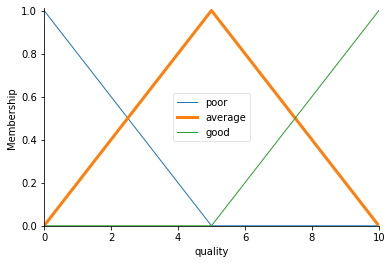

In [ ]:
quality['average'].view()

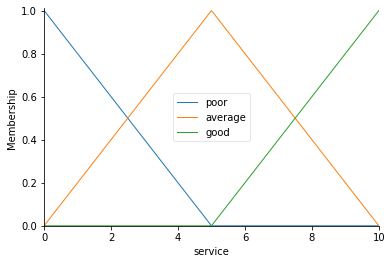

In [ ]:
service.view()

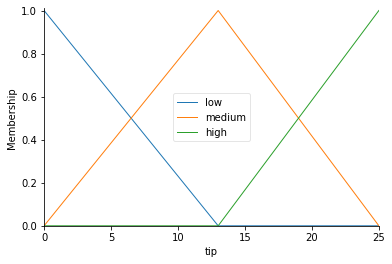

In [ ]:
tip.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1c44448ed0>)

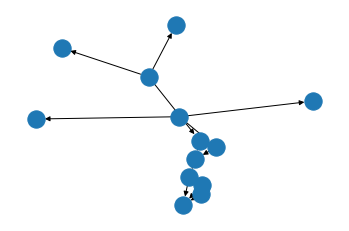

In [ ]:
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['low'])
rule1.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1c4438a710>)

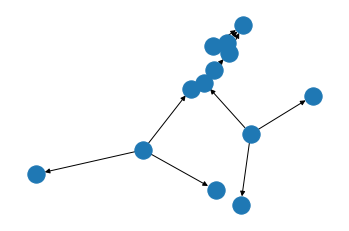

In [ ]:
rule2 = ctrl.Rule(quality['average'] & service['average'], tip['medium'])
rule2.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1c443e4710>)

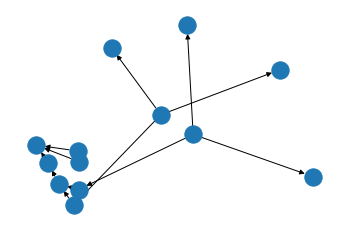

In [ ]:
rule3 = ctrl.Rule(quality['good'] & service['good'], tip['high'])
rule3.view()

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [ ]:
tipping.input['quality'] = 6.5 
tipping.input['service'] = 9.8
tipping.compute()

In [ ]:
print(tipping.output['tip'])

17.93427234232227


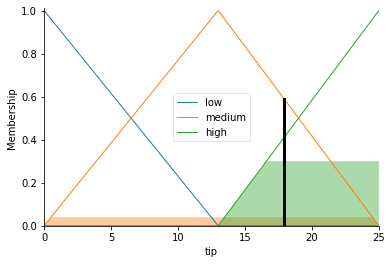

In [ ]:
tip.view(sim=tipping)

In [ ]:
tipping.input['quality'] = 9
tipping.input['service'] = 11
tipping.compute()

In [ ]:
print(tipping.output['tip'])

20.866666666666667


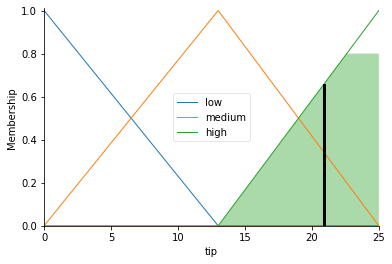

In [ ]:
tip.view(sim=tipping)